In [3]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

# !pip install --upgrade mssuite
# !pip install pandas
# !pip install numpy
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install scipy
# !pip install git+https://github.com/science64/DynaTMT-py-SB.git

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB.DynaTMT as mePROD
import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [5]:
wd = "" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/

psms = pd.read_csv(wd+"20200724_MAA_SB_126_CCCP+ISRIB_Import_PSMs.txt",sep='\t',header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# psms = pd.read_excel(wd+"20200724_MAA_SB_126_CCCP+ISRIB_Import_PSMs.xslx",sep='\t',header=0) #  EXCEL file: you provide your .xlsx  PSM or peptide file here.

print(psms.dtypes)

PSMs Workflow ID                int64
PSMs Peptide ID                 int64
Checked                          bool
Confidence                     object
Identifying Node               object
PSM Ambiguity                  object
Annotated Sequence             object
Modifications                  object
# Proteins                      int64
Master Protein Accessions      object
Protein Accessions             object
# Missed Cleavages              int64
Charge                          int64
DeltaScore                    float64
DeltaCn                       float64
Rank                            int64
Search Engine Rank              int64
m/z [Da]                      float64
MH+ [Da]                      float64
Theo. MH+ [Da]                float64
DeltaM [ppm]                  float64
Deltam/z [Da]                 float64
Activation Type                object
MS Order                       object
Isolation Interference [%]    float64
Average Reporter S/N          float64
Ion Inject T

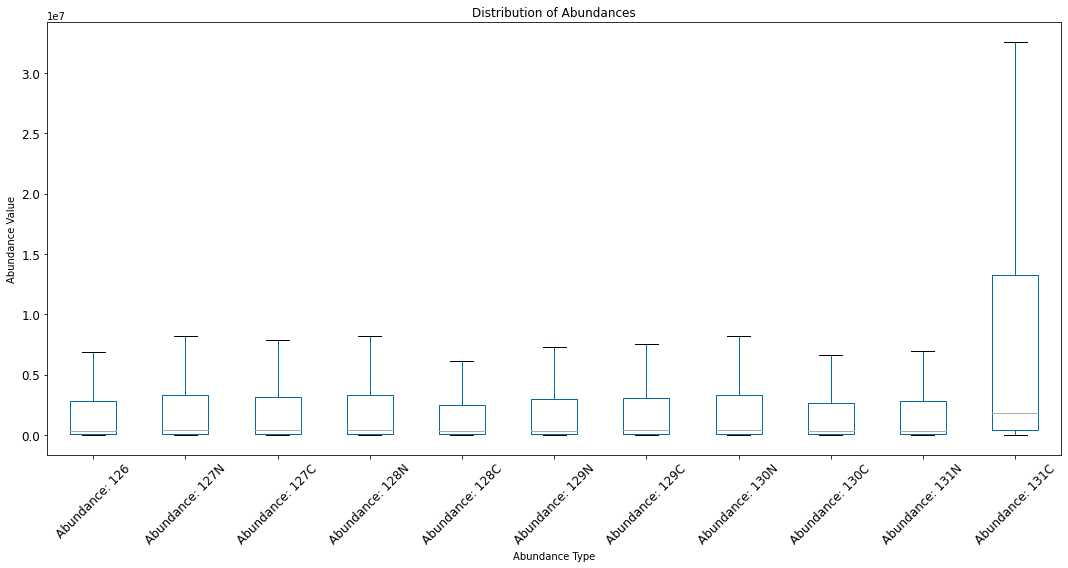

In [13]:
abundance_columns = [col for col in psms.columns if 'Abundance:' in col]
abundance_df = psms[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("Abundance Type")
plt.tight_layout()
plt.show()

In [6]:
process = mePROD.PD_input(psms)

Calling function: IT_adjustment
IT adjustment


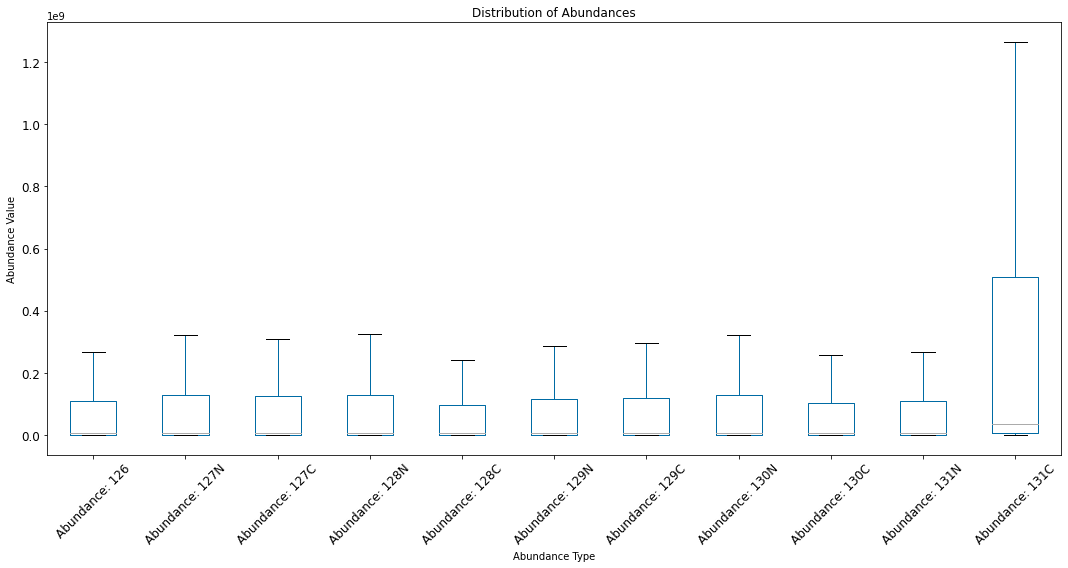

In [14]:
IT_adjusted = process.IT_adjustment()

abundance_columns = [col for col in IT_adjusted.columns if 'Abundance:' in col]
abundance_df = IT_adjusted[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("Abundance Type")
plt.tight_layout()
plt.show()

Calling function: total_intensity_normalisation


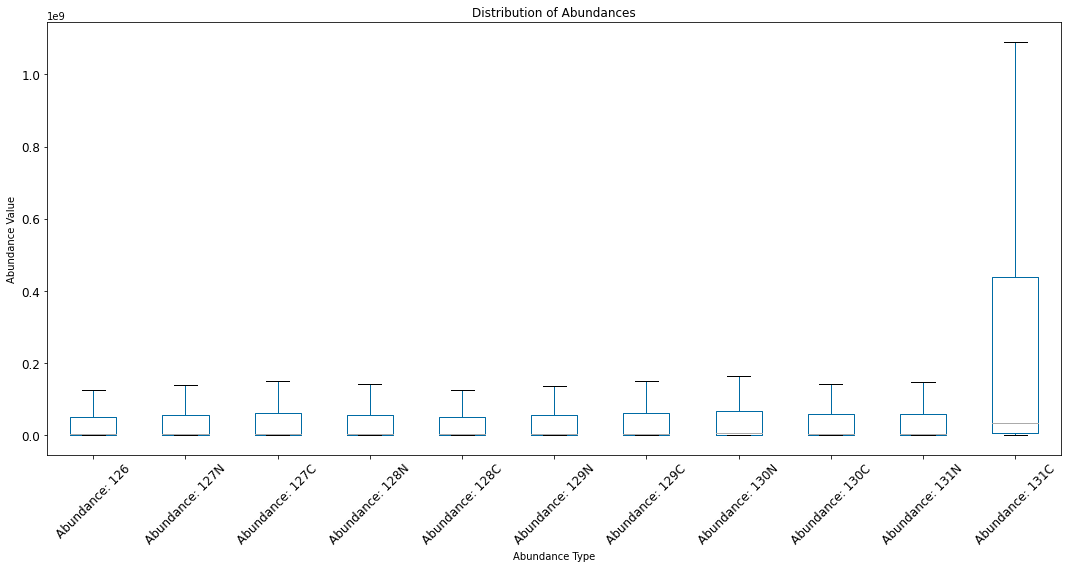

In [18]:
sumNorm = process.total_intensity_normalisation()

abundance_columns = [col for col in sumNorm.columns if 'Abundance:' in col]
abundance_df = sumNorm[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("Abundance Type")
plt.tight_layout()
plt.show()

In [21]:
medianNorm = process.Median_normalisation()

abundance_columns = [col for col in medianNorm.columns if 'Abundance:' in col]
abundance_df = medianNorm[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("Abundance Type")
plt.tight_layout()
plt.show()

Normalization
Normalization done


AttributeError: 'NoneType' object has no attribute 'columns'

In [6]:
heavy = process.extract_heavy()

Extraction of labelled peptides
Extraction Done Extracted Peptides: 15104


In [7]:
peptide_data = process.baseline_correction_peptide_return(heavy,random=True)

Baseline correction
['Master Protein Accessions']
Master Protein Accessions


In [8]:
defaults = ms.Defaults()
hypo = ms.HypothesisTesting(defaults)
conditions=['Light','0_DMSO','0_DMSO','0_DMSO','Tg','Tg','Tg','Boost']
pairs = [['0_DMSO','Tg']]

data = hypo.peptide_based_lmm_multicore(peptide_data,conditions=conditions,pairs=pairs,drop_missing=True)

521
783
1046
1307
1567


In [10]:
print(data.columns)

Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 131N', 'p_value_Tg_vs_0_DMSO',
       'fold_change_Tg_vs_0_DMSO', 'q_value_Tg_vs_0_DMSO'],
      dtype='object')


In [11]:
data.to_excel(wd+"JS55_fractionation_LMM_results.xlsx",engine="openpyxl")